# 第三章 数据探索

数据探索是在具有较为良好的样本后，对样本数据进行解释性的分析工作，它是数据挖掘较为前期的部分。数据探索并不需要应用过多的模型算法，相反，它更偏重于定义数据的本质、描述数据的形态特征并解释数据的相关性。通过数据探索的结果，我们能够更好的开展后续的数据挖掘与数据建模工作。

通过检验数据集的质量，绘制图表，计算某些特征量等手段，对样本数据集的结构和规律进行分析的过程

数据质量分析和数据特征分析

## 3.1 数据的质量分析

检查原始数据是否有脏数据

脏数据：不符合要求，以及不能直接进行相应分析的数据
<br>eg:缺失值
异常值
不一致的值
重复数据及含有特殊符号的数据

### 3.1.1 缺失值的分析

产生原因：有些信息无法获取，获取信息的代价太大  /       信息遗漏     /属性值不存在

对异常值做简单统计分析：统计缺失值的个数，统计每个变量的未缺失数，统计变量的缺失数及缺失率

In [1]:
import pandas as pd
catering_sale='data/catering_sale.xls'
data=pd.read_excel(catering_sale,index_col=u'日期')#返回值DataFrame or dict of DataFrames
print(data.describe())

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


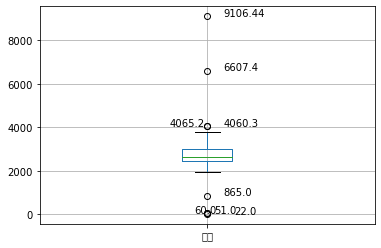

In [4]:
#-*- coding: utf-8 -*-
import pandas as pd

catering_sale = 'data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))
plt.show() #展示箱线图


## 3.2 数据特征分析

对数据进行质量分析后，接下来就是对数据进行特征分析。一般可利用绘制图表，计算某种特征量等手段进行数据的特征分析

### 3.2.1 分布分析

<p>
    对于定量变量而言，选择“组数”和“组宽”是做频率分布分析时最主要的问题，一般按照以下步骤进行：
    <br>求极差
    <br>决定组距与组数
    <br>决定分点
    <br>列出频率分布表
    <br>绘制频率分布直方图
<p>
    遵循的主要原则如下:
    <br>各组之间必须是相互排斥的。
    <br>各组必须将所有的数据包含在内
    <br>各组的组宽最好相等
<p>
    <br> （1） 求极差
    <br>极差 = 最大值 - 最小值 = 3960 - 45 = 3915
    <br>（2）分组
    <br>这里根据业务数据的含义，可取组距为500.
    <br>组数 = 极差 / 组距 = 3915 / 500 = 7.83 => 8
    <br>（3）决定分点
    <br>（4）绘制频率分布直方图
    <p>根据分组区间得到如下表所示的频率分布表。其中，第1列将数据所在的范围分成若干组段，第1个组段要包括最小值，最后一个组段要包括最大值。习惯上各组设为左闭右开的半开区间，


### 3.2.2 对比分析

<p>
    对比分析是指把两个相互联系的指标进行比较，从数量上展示和说明研究对象规模的大小，水平的高低，速度的快慢，以及各种关系是否协调。特别适用于指标间的横纵向比较、时间序列的比较分析。在对比分析中，选择合适的对比标准是十分关键的步骤，只有选择合适，才能做出客观的评价，选择不合适，评价可能得出错误的结论。
对比分析主要有以下两种形式：
    <p>（1）绝对数比较
        绝对数比较是利用绝对数进行对比，从而寻找差异的一种方法。
    <p>（2）相对数比较
        相对数比较是由两个有联系的指标对比计算的，用以反映客观现象之间数量联系程度的综合指标，其数值表现为相对数。由于研究目的和对比基础不同，相对数可以分为以下几种。
    <p>

        结构相对数：将同一总体内的部分数值与全部数值对比求得比重，用以说明事物的性质、结构或质量。如居民食品支出额占消费支出总额比重、产品合格率等。

        比例相对数：将同一总体内不同部分的数值进行对比，表明总体内各部分的比例关系。如人口性别比例、投资与消费比例等。

        比较相对数：将同一时期两个性质相同的指标数值进行对比，说明同类现象在不同条件下的数量对比关系。如不同地区商品价格对比，不同行业、不同企业间某项指标对比等。

        强度相对数：将两个性质不同但有一定联系的总量指标进行对比，用以说明现象的强度、密度和普通程度。如人均国内生产总值用“元/人”表示，人口密度用“人/平方公里”表示，也有用百分数或千分数表示的，如人口出生率用‰表示。
    
        计划完成程度相对数：是某一时期实际完成数与计划数的对比，用以说明计划完成程度。
    
        动态相对数：将同一现象在不同时期的指标数值进行对比，用以说明发展发向和变化的速度。如发展速度、增长速度。

### 3.2.3 统计量分析


用统计指标对定量数据进行描述，常从集中趋势和离中趋势两个方面进行分析

<p>
    <br>平均水平指标：对个体集中趋势的度量
    <br>使用最广的是均值和中位数
    <br>水平的度量：四分位数，标准差
<p>

<p>
    <br>集中趋势度量：均值、中位数、众数
    <br>离中趋势度量：极差、标准差、变异系数

In [3]:
# 代码3-6 餐饮销量数据统计量分析

# 餐饮销量数据统计量分析
import pandas as pd

catering_sale = 'data/catering_sale.xls'  # 餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期')  # 读取数据，指定“日期”列为索引列
data = data[(data[u'销量'] > 400)&(data[u'销量'] < 5000)]  # 过滤异常数据
statistics = data.describe()  # 保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']  # 极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']  # 变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']  # 四分位数间距

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


### 3.2.4 周期性分析

/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-p

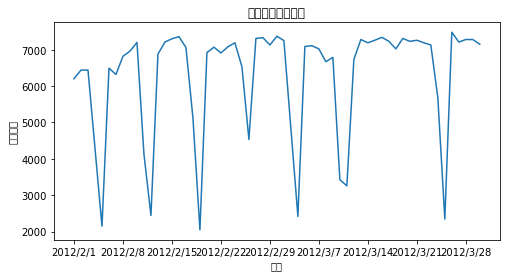

In [9]:
# 代码3-7 某单位日用电量预测分析

import pandas as pd
import matplotlib.pyplot as plt

df_normal = pd.read_csv("data/user.csv")
plt.figure(figsize=(8,4))
plt.plot(df_normal["Date"],df_normal["Eletricity"])
plt.xlabel("日期")
plt.ylabel("每日电量")
# 设置x轴刻度间隔
x_major_locator = plt.MultipleLocator(7)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("正常用户电量趋势")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.show()  # 展示图片



/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-p

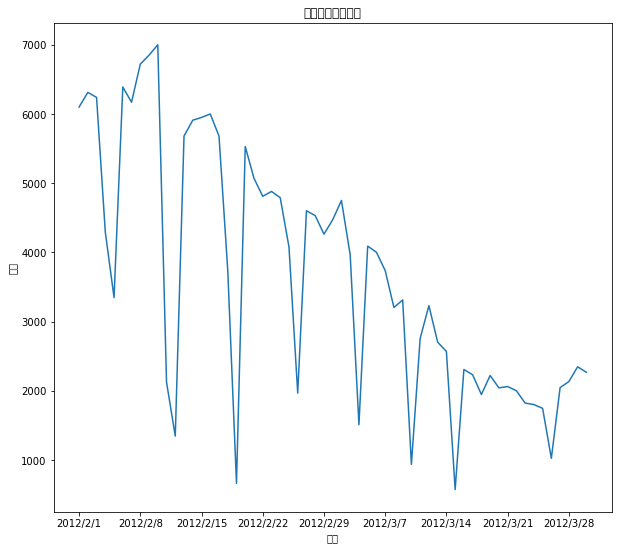

In [10]:

# 窃电用户用电趋势分析
df_steal = pd.read_csv("data/Steal user.csv")
plt.figure(figsize=(10, 9))
plt.plot(df_steal["Date"],df_steal["Eletricity"])
plt.xlabel("日期")
plt.ylabel("日期")
# 设置x轴刻度间隔
x_major_locator = plt.MultipleLocator(7)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("窃电用户电量趋势")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.show()  # 展示图片

### 3.2.5 贡献度分析

帕累托法则又称为2-8定律

/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wangduan/opt/anaconda3/lib/python3.8/site-p

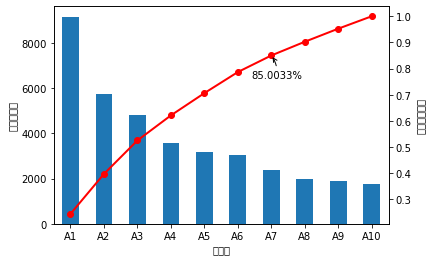

In [12]:
# 代码3-8 菜品盈利帕累托图

# 菜品盈利数据 帕累托图
import pandas as pd

# 初始化参数
dish_profit = 'data/catering_dish_profit.xls'  # 餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = '菜品名')
data = data['盈利'].copy()
data.sort_values(ascending = False)

import matplotlib.pyplot as plt  # 导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # 添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel('盈利（比例）')
plt.show()

### 3.2.6 相关性分析

分析连续变量之间的线性相关程度

相关性分析方法主要有：直接绘制散点图，绘制散点图矩阵，计算相关系数
<br>相关系数
<br>Pearson相关系数
<br>spearman相关系数

### 3.3 python主要数据探索函数

### 3.3.1 基本统计特征函数

In [23]:
from pandas import DataFrame
A = [1,2,3,4]
B = [[3,4,5,6],
    [2,3,4,5],
    [5,6,7,8],
    [3,4,6,7]]
C = DataFrame(B,A)
print(C)

   0  1  2  3
1  3  4  5  6
2  2  3  4  5
3  5  6  7  8
4  3  4  6  7
